# K-Means

In [22]:
import pandas as pd

df_data = pd.read_csv('../data/2d_clustering_normal.csv')

In [23]:
df_data.head()

,x,y,label
0,0.418881,7.589859,2
1,1.381609,7.897040,2
2,8.610473,-7.119439,1
3,7.806046,-8.264540,1
4,5.967160,-7.247959,1


In [24]:
data = df_data.drop('label',axis=1)
label = df_data['label']

### Run k-means

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
predictions = kmeans.fit_predict(data)

In [34]:
df_data['pred_label'] = predictions

### Find the centers of the clusters

In [35]:
print(kmeans.cluster_centers_)

[[ 0.03237378  6.76708375]
 [ 7.53521516 -6.80888465]
 [-1.41551262 -2.59874721]]


<Figure size 432x288 with 0 Axes>

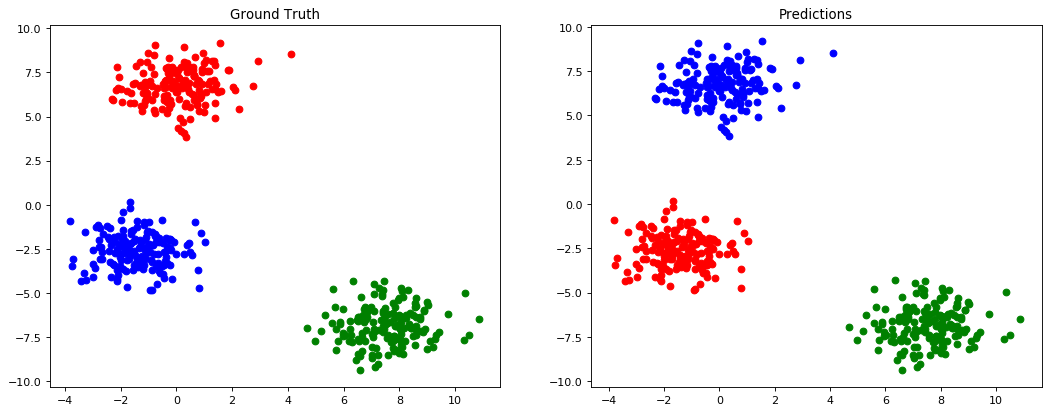

In [36]:
from matplotlib import pyplot as plt
import numpy as np

colors = {0:'b', 1:'g', 2:'r', 3:'c', 4:'m', 5:'y', 6:'k'}

plt.figure()
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
unq_labels = np.unique(df_data['label'])
for i in unq_labels:
    df = df_data.loc[df_data['label'] == i][['x','y']]
    x = df['x']
    y = df['y']
    plt.scatter(x, y, c=colors[i], alpha=1)
    plt.title('Ground Truth')
    
plt.subplot(1,2,2)
unq_labels = np.unique(df_data['pred_label'])
for i in unq_labels:
    df = df_data.loc[df_data['pred_label'] == i][['x','y']]
    x = df['x']
    y = df['y']
    plt.scatter(x, y, c=colors[i], alpha=1)
    plt.title('Predictions')
    
plt.show()

## How k-means works

<img src='img/k_means.gif'>

[Image Src](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

## Hyperparameters

### 1) k -> number of clusters
- Need to know before hand the number of clusters

<Figure size 432x288 with 0 Axes>

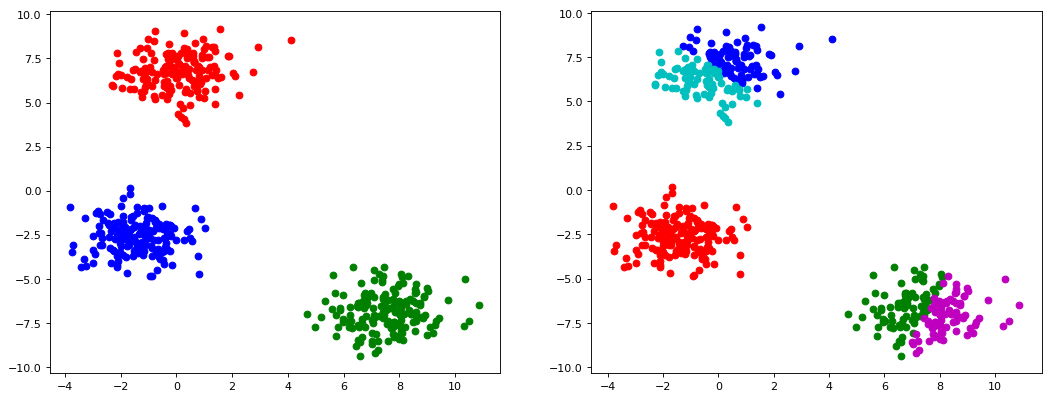

In [70]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
predictions = kmeans.fit_predict(data)

df_data['pred_label'] = predictions

colors = {0:'b', 1:'g', 2:'r', 3:'c', 4:'m', 5:'y', 6:'k'}

plt.figure()
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
unq_labels = np.unique(df_data['label'])
for i in unq_labels:
    df = df_data.loc[df_data['label'] == i][['x','y']]
    x = df['x']
    y = df['y']
    plt.scatter(x, y, c=colors[i], alpha=1)
    
plt.subplot(1,2,2)
unq_labels = np.unique(df_data['pred_label'])
for i in unq_labels:
    df = df_data.loc[df_data['pred_label'] == i][['x','y']]
    x = df['x']
    y = df['y']
    plt.scatter(x, y, c=colors[i], alpha=1)
    
plt.show()

### 2) Initial centroids
- The initial selected centroids are also important to converge quickly

In [71]:
df = df_data.loc[df_data['label'] == 0].head(3)[['x', 'y']]
print(df)

           x         y
10 -1.663919 -2.601120
17 -2.454137 -1.835214
20  0.796511 -4.743726


In [72]:
init = df.values
init

array([[-1.66391944, -2.60111993],
       [-2.45413736, -1.83521449],
       [ 0.79651111, -4.74372581]])

[[-1.66391944 -2.60111993]
 [-2.45413736 -1.83521449]
 [ 0.79651111 -4.74372581]]


/Users/talat/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


<Figure size 432x288 with 0 Axes>

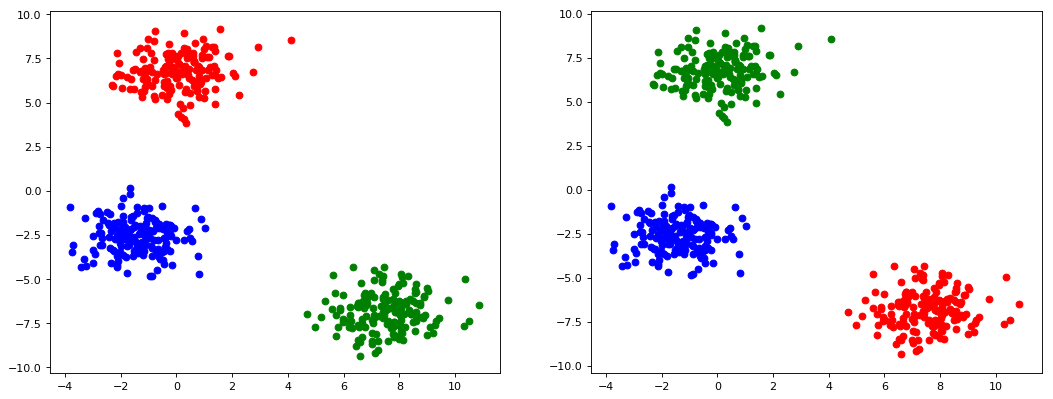

In [73]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init=init)
kmeans.fit(data)
predictions = kmeans.fit_predict(data)

print(kmeans.init)

df_data['pred_label'] = predictions

colors = {0:'b', 1:'g', 2:'r', 3:'c', 4:'m', 5:'y', 6:'k'}

plt.figure()
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
unq_labels = np.unique(df_data['label'])
for i in unq_labels:
    df = df_data.loc[df_data['label'] == i][['x','y']]
    x = df['x']
    y = df['y']
    plt.scatter(x, y, c=colors[i], alpha=1)
    
plt.subplot(1,2,2)
unq_labels = np.unique(df_data['pred_label'])
for i in unq_labels:
    df = df_data.loc[df_data['pred_label'] == i][['x','y']]
    x = df['x']
    y = df['y']
    plt.scatter(x, y, c=colors[i], alpha=1)
    
plt.show()